# Bienvenidos a la tercera práctica de Física Computacional 2024-2 
* Alumna Ayudante: Valentina Santelices
    * Correo: vsantelices2021@udec.cl
* Alumno Ayudante: Juan Ortega
    * Correo: juortega2019@udec.cl

# Let's buckle down and work!

<div style="display: flex; justify-content: center; align-items: center;">
  <div style="margin-right: 10px;">
    <img src="imagenes/sheldon.png" alt="Figura 6.1 Subdivisión del intervalo de integración en el caso de cuando n = 4">
  </div>
  <div>
    <img src="imagenes/raj.png" alt="Figura 6.1 Subdivisión del intervalo de integración en el caso de cuando n = 4">
  </div>
</div>




* Enlace: https://www.youtube.com/watch?v=i5oc-70Fby4

##  La Definición desde el Cálculo

La definición de una integral definida introducida en el cálculo sirve como base para muchos de los métodos de integración numérica más simples. Para revisar esta definición, primero se subdivide el intervalo como se muestra en la Figura 6.1. En este caso, $x_1 < x_2 < \cdots < x_{n+1}$, donde $a = x_1$ y $b = x_{n+1}$. La razón de esto es la propiedad aditiva de las áreas, que para una integral puede escribirse como:

$$
\int_a^b f(x) \, dx = \int_{x_1}^{x_2} f(x) \, dx + \int_{x_2}^{x_3} f(x) \, dx + \cdots + \int_{x_n}^{x_{n+1}} f(x) \, dx
$$

$$
= \sum_{i=1}^{n} \int_{x_i}^{x_{i+1}} f(x) \, dx. \tag{1}
$$

De cada subintervalo $[x_i, x_{i+1}]$, se elige un punto $c_i$ y luego se aproxima el área con la cantidad $f(c_i)(x_{i+1} - x_i)$. Esto se ilustra en la Figura 6.2. Suponiendo que $f \in C[a,b]$, entonces el valor de la integral se aproxima a medida que el número de subdivisiones aumenta. En otras palabras,

$$
\int_a^b f(x) \, dx \equiv \lim_{n \to \infty} \sum_{i=1}^{n} f(c_i)(x_{i+1} - x_i).
$$

Esto es útil porque dada cualquier subdivisión particular obtenemos la aproximación:

$$
\int_a^b f(x) \, dx \approx \sum_{i=1}^{n} f(c_i)(x_{i+1} - x_i).
$$

Además, somos libres de elegir $c_i$ del subintervalo $[x_i, x_{i+1}]$ de cualquier manera que queramos, por lo que podemos producir diferentes métodos numéricos dependiendo de cómo hagamos esta elección.

Los ejemplos usualmente considerados en el cálculo implican escoger uno de los extremos, ya sea $c_i = x_i$ o $c_i = x_{i+1}$. Otro es el punto medio $c_i = \frac{1}{2}(x_i + x_{i+1})$. Cualquiera que sea la elección hecha, la regla de integración resultante sobre cada subintervalo es...


<p align="center">
  <img src="imagenes/fig_661.png" alt="Figura 6.1 Subdivisión del intervalo de integración en el caso de cuando n = 4">
</p>

<p align="center">Figura 6.1 Subdivisión del intervalo de integración en el caso de cuando n = 4</p>

<p align="center">
  <img src="imagenes/fig_662.png" alt="Figura 6.1 Subdivisión del intervalo de integración en el caso de cuando n = 4">
</p>

<p align="center">Figura 6.1 Subdivisión del intervalo de integración en el caso de cuando n = 4</p>



$$
\int_{x_i}^{x_{i+1}} f(x) \, dx \approx f(c_i)(x_{i+1} - x_i). \tag{2}
$$

En lo que sigue, se asume que los $x_i$ están igualmente espaciados. En consecuencia, $x_i = a + (i - 1)h$, para $i = 1, 2, \cdots, n + 1$, donde $h = \frac{(b - a)}{n}$.

### Derivación del Error

En cálculo, la pregunta es si el método converge a medida que $n \to \infty$. En computación, es importante saber qué tan rápido converge. Esta es la razón para preguntar: ¿qué tan precisa es la aproximación en (2)? El teorema de Taylor, como de costumbre, se puede usar para responder a esta pregunta. Primero, expandiendo alrededor de $x = c_i$, obtenemos

$$
f(x) = f(c_i) + (x - c_i)f'(c_i) + \frac{1}{2}(x - c_i)^2 f''(c_i) + \cdots. \tag{3}
$$

Con esto,

$$
\int_{x_i}^{x_{i+1}} f(x) \, dx = \int_{x_i}^{x_{i+1}} \left[ f(c_i) + (x - c_i)f'(c_i) + \frac{1}{2}(x - c_i)^2 f''(c_i) + \cdots \right] dx
$$

$$
= f(c_i)h + h z_i f'(c_i) + \frac{1}{24} h \left( 12z_i^2 + h^2 \right) f''(c_i) + \cdots,
$$

donde $h = x_{i+1} - x_i$ y $z_i = x_i + \frac{h}{2} - c_i$. Por lo tanto, al usar la aproximación en (2), el error en la aproximación es

$$
E = h z_i f'(c_i) + \frac{1}{24} h^2 \left( 12z_i^2 + h^2 \right) f''(c_i) + \cdots. \tag{4}
$$

Entonces, si tomas $c_i = x_i$, entonces $z_i = h/2$ y $E = \frac{1}{2} h^2 f'(x_i) + \frac{1}{8} h^3 f''(x_i) + \cdots$. En otras palabras, para valores pequeños de $h$, $E = O(h^2)$. De manera similar, si $c_i = x_{i+1}$, entonces $z_i = -h/2$ y $E = O(h^2)$. Para obtener un error menor necesitamos elegir $c_i$ de modo que $z_i = 0$, y esto significa que elegimos $c_i = x_i + \frac{h}{2}$. El error en este caso...


### 6.1.1 Regla del Punto Medio

Vale la pena examinar la elección $c_i = x_i + \frac{h}{2}$ en más detalle. Acabamos de demostrar que

$$
\int_{x_i}^{x_{i+1}} f(x) \, dx = f\left(x_i + \frac{h}{2}\right)h + O(h^3). \tag{5}
$$

Esto da lugar a lo que se conoce como la **regla del punto medio**. Cuando esto se introduce en la fórmula para la integral definida (1) obtenemos

$$
\int_a^b f(x) \, dx = \left[ f\left(x_1 + \frac{h}{2}\right)h + O(h^3) \right] + \left[ f\left(x_2 + \frac{h}{2}\right)h + O(h^3) \right]
$$

$$
+ \cdots + \left[ f\left(x_n + \frac{h}{2}\right)h + O(h^3) \right]
$$

$$
= h \left[ f\left(x_1 + \frac{h}{2}\right) + f\left(x_2 + \frac{h}{2}\right) + \cdots + f\left(x_n + \frac{h}{2}\right) \right] + n O(h^3)
$$

$$
= I_M + O(h^2), \tag{6}
$$

donde

$$
I_M = h \left[ f\left(x_1 + \frac{h}{2}\right) + f\left(x_2 + \frac{h}{2}\right) + \cdots + f\left(x_n + \frac{h}{2}\right) \right]. \tag{7}
$$

La expresión en (7) se conoce como la **regla del punto medio compuesta**. Nota que el error para la regla compuesta en (6) es un factor de $h$ menor que la regla de integración (5). Esto sucede porque $n = (b - a)/h$. Por lo tanto, el término $n O(h^3)$ se convierte en $O(h^2)$.

La fórmula del error en (4) fue derivada usando una serie de Taylor, lo que nos permitió concluir en (6) que el error $E_M$ de la regla del punto medio compuesta es $O(h^2)$. Si en lugar de esto usamos el teorema de Taylor con el resto, es posible demostrar que $E_M = \frac{b-a}{24} h^2 f''(\eta)$, donde $\eta$ es un punto en algún lugar en el intervalo $a < x < b$. Con esto, ahora podemos escribir el siguiente resultado...


**Teorema 1.** Si $f \in C^2[a, b]$ entonces la regla del punto medio compuesta (7) satisface

$$
\left| \int_a^b f(x) \, dx - I_M \right| \leq \frac{b - a}{24} h^2 \|f''\|_\infty, \tag{8}
$$

donde $\|f''\|_\infty = \max_{a \leq x \leq b} |f''(x)|$.


### Ejemplo 1

1. Supongamos que se utiliza la regla del punto medio compuesta para aproximar el valor de

$$
\int_0^1 e^{3x} \, dx. \tag{9}
$$

Usando tres subintervalos, se obtiene la aproximación mostrada en la Figura 3. En este caso, $h = 1/3$, y los puntos medios son $x_1 + \frac{h}{2} = 1/6$, $x_2 + \frac{h}{2} = 1/2$, y $x_3 + \frac{h}{2} = 5/6$. Con esto, (7) se convierte en

$$
I_M = \frac{1}{3} \left( e^{1/2} + e^{3/2} + e^{5/2} \right) \approx 6.1043.
$$



<p align="center">
  <img src="imagenes/integracion_1.png" alt="Figura 6.3 Composite midpoint rule used with $f(x) = e^{3x}$ for 3 subintervals. The area of the dashed (red) boxes is used as the approximate area for the area under the curve.">
</p>
<p align="center">Figura 6.1 Subdivisión del intervalo de integración en el caso de cuando n = 4</p>



### Paso 1: Identificación de los parámetros

Dados:

- La función a integrar es $f(x) = e^{3x}$.
- El intervalo de integración es $[0, 1]$.
- Vamos a dividir el intervalo en $n = 3$ subintervalos, por lo tanto, $h = \frac{1 - 0}{3} = \frac{1}{3}$.

Los puntos medios son:

- $x_1 + \frac{h}{2} = \frac{1}{6}$
- $x_2 + \frac{h}{2} = \frac{1}{2}$
- $x_3 + \frac{h}{2} = \frac{5}{6}$

### Paso 2: Aplicación de la regla del punto medio compuesta

La fórmula para la regla del punto medio compuesta es:

$$
I_M = h \left[ f\left(x_1 + \frac{h}{2}\right) + f\left(x_2 + \frac{h}{2}\right) + f\left(x_3 + \frac{h}{2}\right) \right]
$$

Sustituyendo los valores:

$$
I_M = \frac{1}{3} \left[ f\left(\frac{1}{6}\right) + f\left(\frac{1}{2}\right) + f\left(\frac{5}{6}\right) \right]
$$

### Paso 3: Cálculo de los valores de la función en los puntos medios

Evaluamos $f(x) = e^{3x}$ en cada uno de los puntos medios:

1. $f\left(\frac{1}{6}\right) = e^{\frac{3}{6}} = e^{\frac{1}{2}}$
2. $f\left(\frac{1}{2}\right) = e^{\frac{3}{2}}$
3. $f\left(\frac{5}{6}\right) = e^{\frac{5}{2}}$

### Paso 4: Sustitución y cálculo final

Ahora sustituimos estos valores en la fórmula para obtener la aproximación:

$$
I_M = \frac{1}{3} \left( e^{\frac{1}{2}} + e^{\frac{3}{2}} + e^{\frac{5}{2}} \right)
$$

Calculando estos valores:

1. $e^{\frac{1}{2}} \approx 1.6487$
2. $e^{\frac{3}{2}} \approx 4.4817$
3. $e^{\frac{5}{2}} \approx 12.1825$

Entonces,

$$
I_M \approx \frac{1}{3} \left( 1.6487 + 4.4817 + 12.1825 \right) = \frac{1}{3} \times 18.3129 \approx 6.1043
$$

### Paso 5: Conclusión

La aproximación de la integral $\int_0^1 e^{3x} \, dx$ utilizando la regla del punto medio compuesta con $n = 3$ subintervalos es aproximadamente $6.1043$.


Aproximación de la integral usando la regla del punto medio compuesta: 6.1043


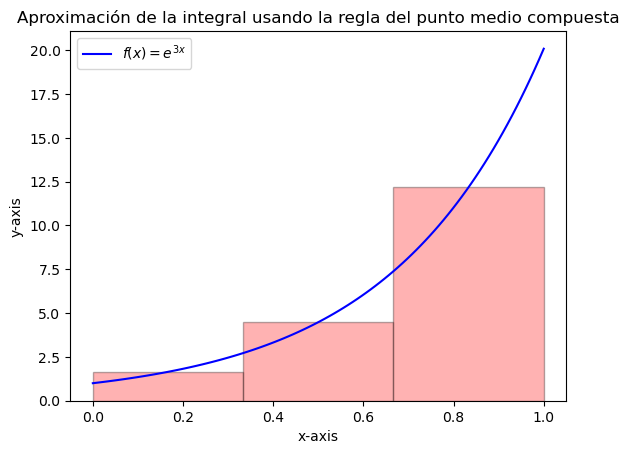

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Definir la función a integrar
def f(x):
    return np.exp(3 * x)

# Definir los parámetros
a = 0
b = 1
n = 3
h = (b - a) / n

# Calcular los puntos medios
midpoints = np.array([a + (i + 0.5) * h for i in range(n)])

# Aplicar la regla del punto medio compuesta
IM = h * np.sum(f(midpoints))
print(f"Aproximación de la integral usando la regla del punto medio compuesta: {IM:.4f}")

# Graficar la función y la aproximación
x_values = np.linspace(a, b, 100)
y_values = f(x_values)

plt.plot(x_values, y_values, label=r'$f(x) = e^{3x}$', color='blue')

for midpoint in midpoints:
    plt.bar(midpoint, f(midpoint), width=h, alpha=0.3, align='center', color='red', edgecolor='black')

plt.title('Aproximación de la integral usando la regla del punto medio compuesta')
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.legend()

plt.show()


## Ejercicio clase

Utilizando el código proporcionado anteriormente como referencia, aplique el mismo procedimiento para la función $f(x) = x^2$. Siga los pasos detallados a continuación:

1. **Defina la función** $f(x) = x^2$.
2. **Mantenga los parámetros** del intervalo de integración $[0, 1]$ y utilice $n = 3$ subintervalos.
3. **Calcule los puntos medios** de cada subintervalo y utilice la regla del punto medio compuesta para aproximar la integral.
4. **Implemente el código en Python** para calcular la aproximación y graficar tanto la función como los rectángulos que representan la aproximación de la integral.
5. **Compare** los resultados obtenidos con la integral exacta y discuta cómo la elección de $n$ influye en la precisión de la aproximación.


Aproximación de la integral usando la regla del punto medio compuesta: 0.3241


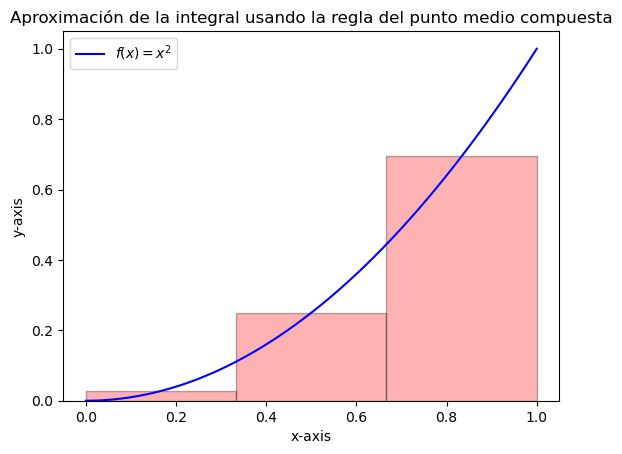

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Definir la nueva función a integrar
def f(x):
    return x**2

# Definir los parámetros
a = 0
b = 1
n = 3
h = (b - a) / n

# Calcular los puntos medios
midpoints = np.array([a + (i + 0.5) * h for i in range(n)])

# Aplicar la regla del punto medio compuesta
IM = h * np.sum(f(midpoints))
print(f"Aproximación de la integral usando la regla del punto medio compuesta: {IM:.4f}")

# Graficar la función y la aproximación
x_values = np.linspace(a, b, 100)
y_values = f(x_values)

plt.plot(x_values, y_values, label=r'$f(x) = x^2$', color='blue')

for midpoint in midpoints:
    plt.bar(midpoint, f(midpoint), width=h, alpha=0.3, align='center', color='red', edgecolor='black')

plt.title('Aproximación de la integral usando la regla del punto medio compuesta')
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.legend()

plt.show()


## Ejercicio 2

Utilizando el código proporcionado anteriormente como referencia, aplique el mismo procedimiento para la función $f(x) = \sin(2\pi x)$. Siga los pasos detallados a continuación:

1. **Defina la función** $f(x) = \sin(2\pi x)$.
2. **Mantenga los parámetros** del intervalo de integración $[0, 1]$ y utilice $n = 3$ subintervalos.
3. **Calcule los puntos medios** de cada subintervalo y utilice la regla del punto medio compuesta para aproximar la integral.
4. **Implemente el código en Python** para calcular la aproximación y graficar tanto la función como los rectángulos que representan la aproximación de la integral.
5. **Compare** los resultados obtenidos con la integral exacta y discuta cómo la naturaleza oscilatoria de la función y la elección de $n$ influyen en la precisión de la aproximación.


Aproximación de la integral usando la regla del punto medio compuesta: -0.000000000000000111022302462516


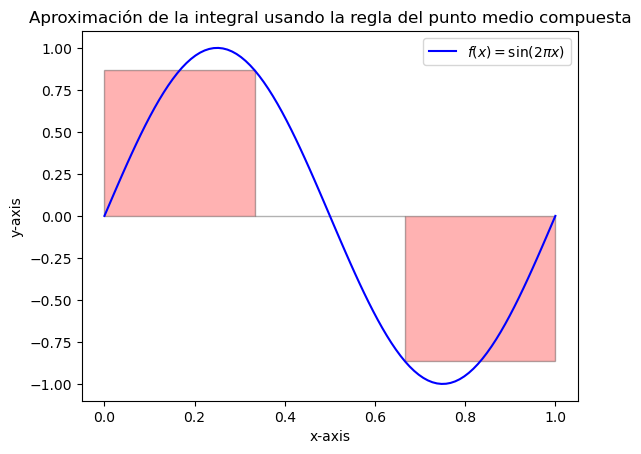

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Definir la nueva función a integrar
def f(x):
    return np.sin(2 * np.pi * x)

# Definir los parámetros
a = 0
b = 1
n = 3
h = (b - a) / n

# Calcular los puntos medios
midpoints = np.array([a + (i + 0.5) * h for i in range(n)])

# Aplicar la regla del punto medio compuesta
IM = h * np.sum(f(midpoints))
print(f"Aproximación de la integral usando la regla del punto medio compuesta: {IM:.30f}")

# Graficar la función y la aproximación
x_values = np.linspace(a, b, 100)
y_values = f(x_values)

plt.plot(x_values, y_values, label=r'$f(x) = \sin(2\pi x)$', color='blue')

for midpoint in midpoints:
    plt.bar(midpoint, f(midpoint), width=h, alpha=0.3, align='center', color='red', edgecolor='black')

plt.title('Aproximación de la integral usando la regla del punto medio compuesta')
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.legend()

plt.show()
